# Assignment 6: Logistic Regression
* Section: 02
* Name: Nate Yoon  
* Due date: 4/7/21 @12pm
* Purpose: To practice and understand the use of logistic regression 

In [1]:
# importing neccessary libraries 

%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


no display found. Using non-interactive Agg backend


In [2]:
# Loading dataset
mowers = pd.read_csv('http://barney.gonzaga.edu/~chuang/data/dmba/RidingMowers.csv')

In [3]:
# Printing dataset
mowers

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


### a. What percentage of households in the study were owners of riding mowers?

In [4]:
x = mowers[(mowers['Ownership'] == 'Owner')].count()
y = mowers[(mowers['Ownership'] == 'Nonowner')].count()
print(x / (x + y))

Income       0.5
Lot_Size     0.5
Ownership    0.5
dtype: float64


### b. Create a scatter plot of Income vs. Lot Size using color or symbol to distinguish owners from nonowners. From the scatter plot, which class seems to have a higher average income, owners or nonowners?

### * Owners have a higher income compared to nonowners

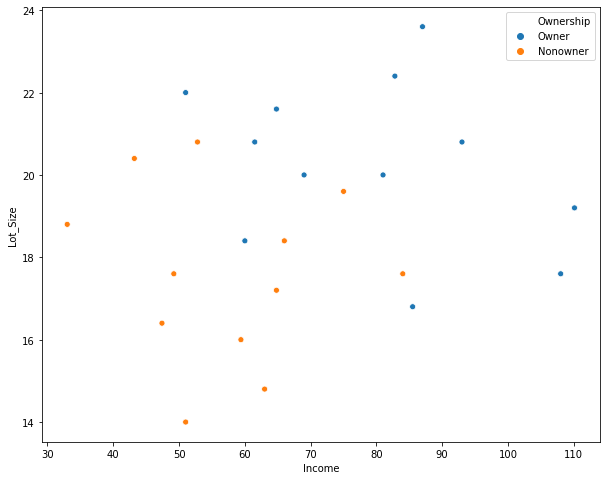

In [5]:
%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=mowers['Income'],
                y=mowers['Lot_Size'], hue=mowers['Ownership'])

### c. Among nonowners, what is the percentage of households classified correctly?

In [6]:
mowers['Verdict']=mowers['Ownership'].apply(lambda x: 1 if(x=='Owner') else 0)

x1 = mowers[['Income','Lot_Size']]
y1 = mowers['Verdict']

In [7]:
x = x1
y = y1
log_regress = LogisticRegression(solver = 'liblinear')

log_regress.fit(X = x, y = y)

print(log_regress.intercept_)
print(log_regress.coef_)

[-0.88085122]
[[ 0.03811386 -0.08186178]]


In [8]:
test_prob = log_regress.predict_proba(X = x1)
preds_prob = pd.DataFrame(test_prob)

preds_prob.columns = ['Nonowner', 'Owner']
preds_prob

,Nonowner,Owner
0,0.525048,0.474952
1,0.268429,0.731571
2,0.544702,0.455298
3,0.559609,0.440391
4,0.376808,0.623192
5,0.148839,0.851161
6,0.142500,0.857500
7,0.391438,0.608562
8,0.472087,0.527913
9,0.276675,0.723325


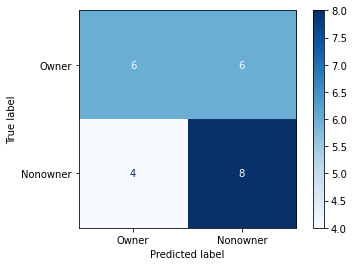

In [9]:
from sklearn import metrics

metrics.plot_confusion_matrix(log_regress,
                     x1,
                     y1,
                     display_labels = ['Owner','Nonowner'],
                     cmap = plt.cm.Blues);

### c. The confusion matrix shows that there are two more nonowners than predicted

### d. To increase

Text(0, 0.5, 'Probability')

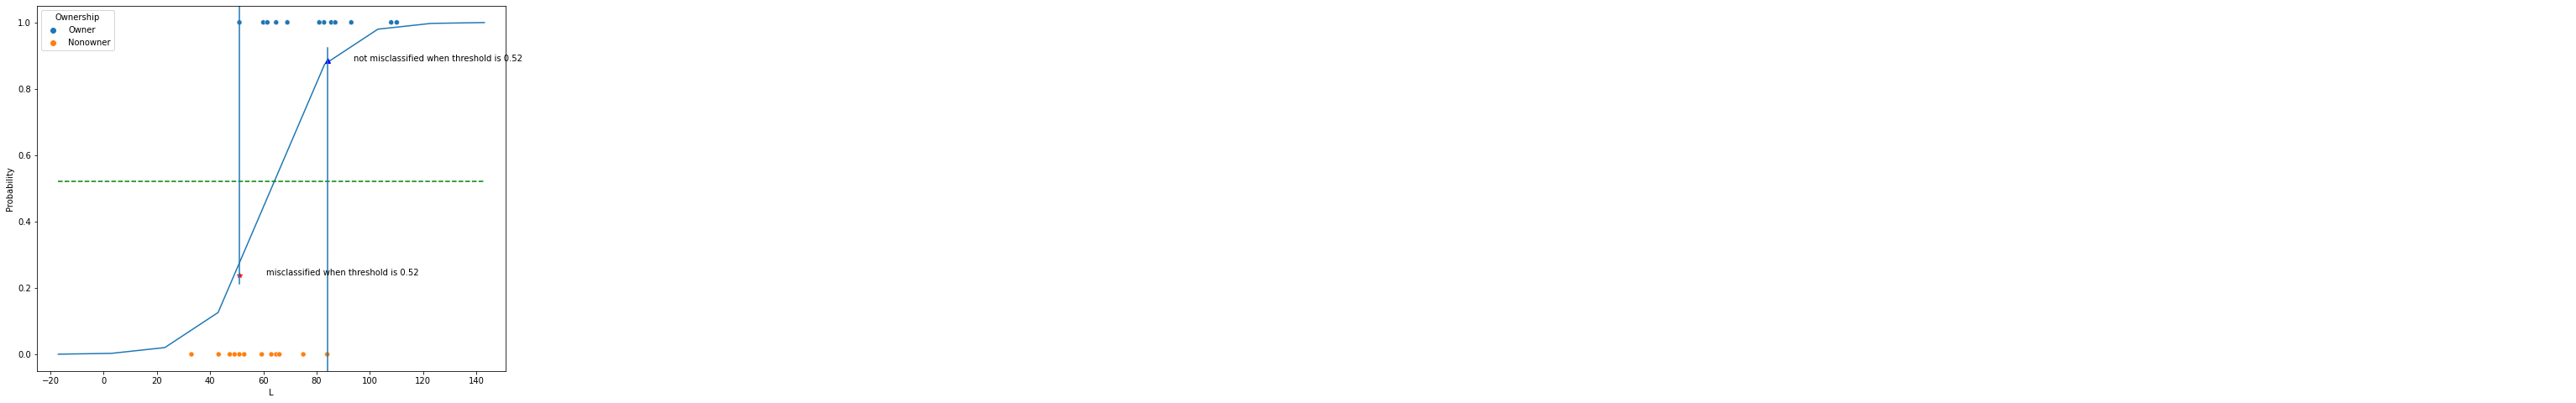

In [14]:
# -- plot sigmoid function --
%matplotlib inline

# -- Scatter plot --
plt.figure(figsize=(10,8))
sns.scatterplot(x=mowers['Income'],
                y=mowers['Verdict'],hue=mowers['Ownership'])

# -- define a sigmoid function --
def sigmoid(x):
    return (1/(1+np.exp(-x*5)))

x_min = mowers['Income'].min()
x_max = mowers['Income'].max()

# -- setup boundary of x-axis and plot the sigmoid function --
x = np.arange(x_min-50,x_max+50,20)
y_temp = [(n-x.mean())/x.std() for n in x]
y = [sigmoid(n) for n in y_temp]
plt.plot(x,y)

# -- plot the threshold line --
y_threshold = [0.52 for n in x]
plt.plot(x,y_threshold,'g--')

# -- where the declined application with max SAT would be clissified according to the sigmoid function --
x_declined_max = mowers.loc[mowers['Verdict']==0,'Income'].max()
x_accepted_min = mowers.loc[mowers['Verdict']==1,'Income'].min()
x_declined_max_std = ((x_declined_max-x.mean())/x.std())
x_accepted_min_std = ((x_accepted_min-x.mean())/x.std())

plt.plot(x_declined_max,sigmoid(x_declined_max_std),'b^')
plt.annotate('not misclassified when threshold is 0.52',xy=(x_declined_max+10,sigmoid(x_declined_max_std)))
plt.annotate('threshold = 0.52',xy=(900, 0.52))

plt.plot(x_accepted_min,sigmoid(x_accepted_min_std),'r*')
plt.annotate('misclassified when threshold is 0.52',xy=(x_accepted_min+10,sigmoid(x_accepted_min_std)))


plt.axvline(x_declined_max,0,sigmoid(x_declined_max_std))
plt.axvline(x_accepted_min,sigmoid(x_accepted_min_std),1)

plt.xlabel("L")
plt.ylabel("Probability")

### e.

In [15]:
newHouse = pd.DataFrame({'Income':[60],
                        'Lot_Size':[20]})
newHouse

,Income,Lot_Size
0,60,20


In [16]:
test_prob = log_regress.predict_proba(X = newHouse)
preds_prob = pd.DataFrame(test_prob)

preds_prob.columns = ['Nonowner', 'Owner']
preds_prob

,Nonowner,Owner
0,0.557557,0.442443


### e. The probability of it becoming an owner is 44%

### f. 

In [17]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
mowers[['Income','Lot_Size']] = scaler.fit_transform(mowers[['Income','Lot_Size']].to_numpy())
newHouse_r = scaler.transform(newHouse.to_numpy()) 
log_regress.predict([newHouse_r[0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

### f. classification is 0 so it will be a non-owner

### g. 

In [18]:
newLot = pd.DataFrame({'Income':[57.5],
                        'Lot_Size':[16]})
newLot

,Income,Lot_Size
0,57.5,16


In [19]:
test_prob = log_regress.predict_proba(X = newLot)
preds_prob = pd.DataFrame(test_prob)

preds_prob.columns = ['Nonowner', 'Owner']
preds_prob

,Nonowner,Owner
0,0.499773,0.500227


In [26]:
print('--- Metrices ---')
print(metrics.classification_report(y_true = y_test, y_pred = preds_prob))

--- Metrices ---


NameError: ignored